# MÉTODOS PARA MANIPULAÇÃO DE DADOS

Além dos métodos para carregar e salvar dados, a biblioteca pandas possui também métodos para a transformação dos dados e a extração de informação.



# MÉTODOS PARA LEITURA E ESCRITA DA BIBLIOTECA PANDAS

A biblioteca pandas foi desenvolvida para trabalhar com dados estruturados, ou seja, dados dispostos em linhas e colunas. Os dados podem estar gravados em arquivos, em páginas web, em APIs, em outros softwares, em object stores (sistemas de armazenamento em cloud) ou em bancos de dados. Para todas essas origens (e até mais), a biblioteca possui métodos capazes de fazer a leitura dos dados e carregar em um DataFrame.

Todos os métodos capazes de fazer a leitura dos dados estruturados possuem prefixo pd.read_XXX, onde pd é o apelido dado no momento da importação da biblioteca e XXX é o restante da sintaxe do método. Além de fazer a leitura a biblioteca possui diversos métodos capazes de escrever o DataFrame em um arquivo, em um banco ou ainda simplesmente copiar para a área de transferência do sistema operacional. O Quadro 4.2, apresenta todos os métodos de leitura e escrita. Veja que são suportados tanto a leitura de arquivos de texto, como binários e de bancos.

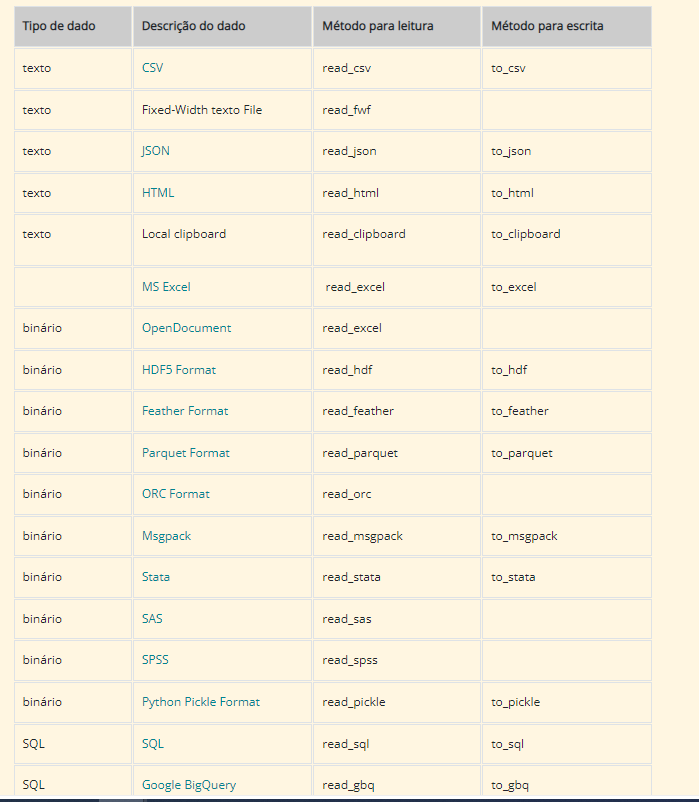

Dentre todos os possíveis métodos para leitura, nessa aula vamos estudar o read_json, o read_csv e a função read_sql, que contempla a função read_sql_query.


JSON (JavaScript Object Notation - Notação de Objetos JavaScript) é uma formatação leve de troca de dados e independente de linguagem de programação. Os dados nesse formato podem ser encontrados como uma coleção de pares chave/valor ou uma lista ordenada de valores (https://www.json.org/json-pt.html). Uma chave pode conter uma outra estrutura interna, criando um arquivo com multiníveis. Nessa aula vamos estudar somente a leitura de arquivos com um único nível, ou seja, para uma chave há somente um valor.


CSV (comma-separated values - valores separados por vírgula) é um formato de arquivo, nos quais os dados são separados por um delimitador. Originalmente, esse delimitador é uma vírgula (por isso o nome), mas na prática um arquivo CSV pode ser criado com qualquer delimitador, por exemplo, por ponto e vírgula (;), por pipe (|), dentre outros. Por ser um arquivo de texto, é fácil de ser lido em qualquer sistema, por isso se tornou tão democrático.

# LEITURA DE JSON E CSV COM PANDAS

Agora que vamos começar a ver as implementações, vamos fazer a importação da biblioteca, como já sabemos, só precisamos importar uma única vez no notebook ou no script .py.


In [ ]:
import pandas as pd

A leitura de um arquivo JSON deve ser feita com o método: pandas.read_json(path_or_buf=None, orient=None, typ='frame', dtype=None, convert_axes=None, convert_dates=True, keep_default_dates=True, numpy=False, precise_float=False, date_unit=None, encoding=None, lines=False, chunksize=None, compression='infer'). Os detalhes de cada parâmetro podem ser consultados na documentação oficial: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_json.html. O único parâmetro que é obrigatório para se carregar os dados é o "path_or_buf", no qual deve ser passado um caminho para o arquivo ou um "arquivo como objeto" que é um arquivo lido com a função open(), por exemplo.

Na entrada 2, estamos usando o método read_json para carregar dados de uma API. Veja que estamos passando o caminho para o método. Nessa fonte de dados, são encontradas a taxa selic de cada dia.

In [ ]:
pd.read_json("https://api.bcb.gov.br/dados/serie/bcdata.sgs.11/dados?formato=json").head()

,data,valor
0,04/06/1986,0.065041
1,05/06/1986,0.067397
2,06/06/1986,0.066740
3,09/06/1986,0.068247
4,10/06/1986,0.067041


A leitura de um arquivo CSV deve ser feita com o método: pandas.read_csv(filepath_or_buffer: Union[str, pathlib.Path, IO[~ AnyStr]], sep=',', delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, skipfooter=0, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, cache_dates=True, iterator=False, chunksize=None, compression='infer', thousands=None, decimal: str = '.', lineterminator=None, quotechar='"', quoting=0, doublequote=True, escapechar=None, comment=None, encoding=None, dialect=None, error_bad_lines=True, warn_bad_lines=True, delim_whitespace=False, low_memory=True, memory_map=False, float_precision=None). São muitos parâmetros, o que proporciona uma versatilidade incrível para esse método. Os detalhes de cada parâmetro podem ser consultados na documentação oficial: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html. Vamos comentar alguns.

Para realizar o carregamento os dados, é necessário incluir o caminho(diretório), portanto o parâmetro "filepath_or_buffer" é obrigatório. Outro parâmetro que é importante para a leitura desse arquivo é o sep ou delimiter (ambos fazem a mesma coisa), veja que sep, por padrão possui o valor ',', ou seja, caso não seja especificado nenhum valor, então o método fará a leitura dos dados considerando que estão separados por vírgula. O parâmetro header, tem como valor padrão 'infer', que significa que o método realiza a inferência para os nomes das colunas a partir da primeira linha de dados do arquivo.

Na entrada 3, estamos fazendo a leitura de uma fonte CSV, cujos campos são separados por vírgula, logo não foi preciso especificar um delimitador diferente.



In [ ]:
pd.read_csv("https://people.sc.fsu.edu/~jburkardt/data/csv/cities.csv").head()

,LatD,"""LatM""","""LatS""","""NS""","""LonD""","""LonM""","""LonS""","""EW""","""City""","""State"""
0,41,5,59,"""N""",80,39,0,"""W""","""Youngstown""",OH
1,42,52,48,"""N""",97,23,23,"""W""","""Yankton""",SD
2,46,35,59,"""N""",120,30,36,"""W""","""Yakima""",WA
3,42,16,12,"""N""",71,48,0,"""W""","""Worcester""",MA
4,43,37,48,"""N""",89,46,11,"""W""","""Wisconsin Dells""",WI


# MANIPULAÇÃO DE DADOS COM PANDAS

Além de vários métodos para carregar e salvar os dados, a biblioteca pandas possui uma diversidade de métodos para a transformação dos dados e a extração de informação para áreas de negócio. Nessa seção vamos conhecer alguns deles.

O trabalho com dados: capturar os dados em suas origens, fazer transformações nos dados a fim de padronizá-los, aplicar técnicas estatísticas clássicas ou algoritmos de machine/deep learning feito por engenheiros e cientistas de dados. Cada profissional atuando em uma parte específica, dependendo da organização da empresa. Em todo esse trabalho é comum fazer a divisão em duas etapas: (i) captura e transformação/padronização dos dados, (ii) extração de informações.

# EXEMPLIFICANDO

Para entender como essas duas etapas acontecem no dia a dia das empresas, vamos utilizar os dados da taxa Selic. Selic, ou taxa Selic é a referência base de juros da economia brasileira (https://blog.nubank.com.br/taxa-selic/). O valor da Selic influência todo o setor financeiro do Brasil, por exemplo, se você pretende fazer um financiamento ou um investimento, precisa olhar a taxa Selic, pois ela influenciará o valor a ser pago ou ganho. "Selic é a sigla para Sistema Especial de Liquidação e Custódia, um programa totalmente virtual em que os títulos do Tesouro Nacional são comprados e vendidos diariamente por instituições financeiras" (NUBANK, p. 1, 2020). Quem decide, de fato, o valor da Selic é o Copom (Comitê de Política Monetária do Banco Central), que a cada 45 dias se reúne para determinar se a taxa aumenta ou diminui. Na prática, se a taxa está alta, os financiados podem ficar mais caros e o contrário também, se a taxa está mais baixa, então os financiamentos ficam mais baratos. Resumindo, quando a taxa Selic aumenta o economia desacelera, quando ela abaixa a economia aquece, isso é preciso para controlar a inflação.

Agora que já conhecemos que a taxa Selic influencia, nossos financiamentos, investimentos e até mesmo o que compramos no mercado, vamos extrair as informações disponibilizadas pelo governo e fazer algumas análises. Vamos começar pela etapa de extração e transformação dos dados.

# ETAPA DE CAPTURA E TRANSFORMAÇÃO/ PADRONIZAÇÃO DOS DADOS

A extração dos dados pode ser realizada por meio do método read_json() e guardando em um DataFrame (DF) pandas. Ao carregar os dados em um DF, podemos visualizar quantas linhas e colunas, bem como, os tipos de dados em cada coluna, com o método info(). Observe a entrada 4 e a saída do código a seguir, o método retorna que o DF possui 8552 registros (entradas) e 2 colunas (A quantidade de linhas certamente será diferente quando executar esse código). Os índices são numéricos e variam de 0 a 8551 (N-1). Outras duas informações relevantes que esse método retorna é sobre a quantidade de células sem valor (non-null) e o tipo dos dados nas colunas. Como podemos ver, ambas colunas possuem 8552 valores não nulos, como esse número é igual a quantidade de linhas, então não existem valores faltantes. Quanto ao tipo de dados, o "data" é um object, ou seja, são todos do tipo strings ou existe mistura de tipos; "valor" é um float.

In [ ]:
df_selic = pd.read_json("https://api.bcb.gov.br/dados/serie/bcdata.sgs.11/dados?formato=json")

print(df_selic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9027 entries, 0 to 9026
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   data    9027 non-null   object 
 1   valor   9027 non-null   float64
dtypes: float64(1), object(1)
memory usage: 141.2+ KB
None


# REMOVER LINHAS DUPLICADAS

Para o carregamento de uma base de dados, um dos primeiros tratamentos que devemos fazer é remover os dados duplicados. Certamente, qual registro remover depende da área de negócio e do problema a ser resolvido. Por exemplo, queremos manter o registro da compra atual, ou queremos manter a primeira compra. Um DataFrame da bilioteca pandas possui o método meu_df.drop_duplicates() que permite fazer essa remoção de dados duplicados.

Observe a entrada 5 da linha de código a seguir, usamos o método para remover as linhas duplicadas, pedindo para manter o último registro (keep='last') e, através do parâmetro inplace=True, estamos fazendo com que a transformação seja salva do DataFrame, na prática estamos sobrescrevendo o objeto na memória. Caso inplace não seja passado, a transformação é aplicada, mas não é salva, ou seja, o DF continua da mesma forma anterior a transformação. Outro parâmetro interessante do método é o subset, que permite que a remoção de dados duplicado seja feita com base em uma ou mais colunas.

In [ ]:
df_selic.drop_duplicates(keep='last', inplace=True)

# CRIAR NOVAS COLUNAS

A segunda transformação que veremos é como criar uma nova coluna. A sintaxe é similar a criar uma nova chave em um dicionário: meu_df['nova_coluna'] = dado. Vamos criar uma coluna que adiciona a data de extração das informações. Observe a seguir, do módulo datetime, estamos usando a classe date e o método today(). Na entrada 6, guardamos a data em uma nova coluna, veja que a biblioteca pandas "entende" que esse valor deve ser colocado em todas as linhas. Na linha 7, estamos criando uma nova coluna com o nome do responsável pela extração, veja que basta atribuir a string a uma nova coluna. Temos ainda um problema com o tipo de dados das datas, embora cada valor seja do tipo "date", veja que pelo info() ainda obtemos uma coluna object, para que de fato, a biblioteca interprete como um tipo data, vamos ter que utilizar o método da própria biblioteca para fazer a conversão.

In [ ]:
from datetime import date
from datetime import datetime as dt

data_extracao = date.today()

df_selic['data_extracao'] = data_extracao
df_selic['responsavel'] = "Autora"

print(df_selic.info())
df_selic.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9027 entries, 0 to 9026
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   data           9027 non-null   object 
 1   valor          9027 non-null   float64
 2   data_extracao  9027 non-null   object 
 3   responsavel    9027 non-null   object 
dtypes: float64(1), object(3)
memory usage: 352.6+ KB
None


,data,valor,data_extracao,responsavel
0,04/06/1986,0.065041,2022-06-09,Autora
1,05/06/1986,0.067397,2022-06-09,Autora
2,06/06/1986,0.066740,2022-06-09,Autora
3,09/06/1986,0.068247,2022-06-09,Autora
4,10/06/1986,0.067041,2022-06-09,Autora


# MÉTODO TO_DATETIME() E ASTYPE()

Trabalhar com o tipo "data" pode trazer vantagens, como por exemplo, ordenar da data mais recente para mais antiga, ou ainda verificar a variação da taxa selic em um determinado período. Vamos utilizar os métodos pandas.to_datime() e minha_series.astype() para fazer a conversão e transformar as colunas data e data_extracao. Observe o código a seguir, onde realizamos a transformação e guardamos dentro da própria coluna, dessa forma os valores são sobrescritos. Na linha 1, usamos a notação pd.to_datetime(), porque é um método da biblioteca e não do DF.

Na entrada 7 (linha 1), o método recebe a coluna com os valores a serem alterados (df_selic['data']) e um segundo parâmetro, indicando que no formato atual (antes da conversão) o dia está primeiro (dayfirst=True). Em seguida, na linha 2, como a coluna "data_extracao" foi criada com o método today(), o formato já está correto para a conversão. Nessa conversão usamos o método astype, que transforma os dados de uma coluna (que é uma Series) em um determinado tipo, nesse caso, o tipo datetime especificado. Com astype() podemos padronizar valores das colunas, por exemplo, transformando todos em float, ou int, ou str, ou outro tipo. Veja que agora, ao usar o método info(), temos que ambas colunas são do tipo datetime (datetime da biblioteca pandas). O formato resultante ano-mês-dia é um padrão do datetime64[ns], que segue o padrão internacional, no qual o ano vem primeiro, seguido do mês e por último o dia. Poderíamos usar o stftime() para transformar o traço em barra (/), mas aí o resultado seriam strings e não datas.

In [ ]:
df_selic['data'] = pd.to_datetime(df_selic['data'], dayfirst=True)
df_selic['data_extracao'] = df_selic['data_extracao'].astype('datetime64[ns]')

print(df_selic.info())
df_selic.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9027 entries, 0 to 9026
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   data           9027 non-null   datetime64[ns]
 1   valor          9027 non-null   float64       
 2   data_extracao  9027 non-null   datetime64[ns]
 3   responsavel    9027 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(1)
memory usage: 352.6+ KB
None


,data,valor,data_extracao,responsavel
0,1986-06-04,0.065041,2022-06-09,Autora
1,1986-06-05,0.067397,2022-06-09,Autora
2,1986-06-06,0.066740,2022-06-09,Autora
3,1986-06-09,0.068247,2022-06-09,Autora
4,1986-06-10,0.067041,2022-06-09,Autora


# SERIES.STR

Muitas vezes precisamos padronizar os valores em colunas, por exemplo, queremos ter certeza que a coluna "responsável" possui todas as palavras padronizadas em letras maiúsculas. Quando selecionamos uma coluna no DF sabemos que o resultado é uma Series e esse objeto tem um recurso "str", que permite aplicar as funções de string para todos os valores da Series.

Observe o trecho de código seguir, selecionamos a coluna responsável, acessamos o recurso str e aplicamos o método upper(). Dessa forma, a biblioteca pandas "entende" que queremos converter todos os valores dessa coluna para letras maiúsculas. Como atribuímos o resultado na própria coluna, o valor antigo é substituído.

In [ ]:
df_selic['responsavel'] = df_selic['responsavel'].str.upper()

df_selic.head()

,data,valor,data_extracao,responsavel
0,1986-06-04,0.065041,2022-06-09,AUTORA
1,1986-06-05,0.067397,2022-06-09,AUTORA
2,1986-06-06,0.066740,2022-06-09,AUTORA
3,1986-06-09,0.068247,2022-06-09,AUTORA
4,1986-06-10,0.067041,2022-06-09,AUTORA


# MÉTODO SORT_VALUES()

No código a seguir, estamos usando o método sort_values() que permite ordenar o DF, de acordo com os valores de uma coluna. Esse método é do DataFrame, por isso a notação meu_df.metodo(). Utilizamos três parâmetros do método sort_values, o primeiro informando qual coluna deve ser usada para ordenar, o segundo, para que seja feito em ordem decrescente (do maior para o menor) e o terceiro (inplace=True) significa que queremos modificar o próprio objeto, na prática estamos sobrescrevendo o DF.

In [ ]:
df_selic.sort_values(by='data', ascending=False, inplace=True)

df_selic.head()

,data,valor,data_extracao,responsavel
9026,2022-06-08,0.047279,2022-06-09,AUTORA
9025,2022-06-07,0.047279,2022-06-09,AUTORA
9024,2022-06-06,0.047279,2022-06-09,AUTORA
9023,2022-06-03,0.047279,2022-06-09,AUTORA
9022,2022-06-02,0.047279,2022-06-09,AUTORA


# MÉTODO RESET_INDEX() E SET_INDEX()

Ao fazermos a ordenação dos dados com o método sort_values(), veja que os índices dos cinco primeiros registros é 8551, 8550...85XX. Nenhuma transformação afeta o índice, lembra-se como não especificamos rótulos ele usa um intervalo numérico, mas esse intervalo é diferente da posições de um vetor, pois é um nome e vai acompanhar a linha independente da transformação.

As únicas formas de alterar o índice são com os métodos reset_index() e set_index(). O primeiro redefine o índice usando o padrão e o segundo utiliza define novos índices. Veja o código na entrada 10, estamos usando o método reset_index() para redefinir os índices padrão (sequência numérica). O primeiro parâmetro (drop=True), diz que não queremos usar o índice que será substituído em uma nova coluna e inplace, informa para gravar as alterações no próprio objeto. Veja na saída que agora os cinco primeiros registros, possuem índices de 0 a 4.

In [ ]:
df_selic.reset_index(drop=True, inplace=True)

df_selic.head()

,data,valor,data_extracao,responsavel
0,2022-06-08,0.047279,2022-06-09,AUTORA
1,2022-06-07,0.047279,2022-06-09,AUTORA
2,2022-06-06,0.047279,2022-06-09,AUTORA
3,2022-06-03,0.047279,2022-06-09,AUTORA
4,2022-06-02,0.047279,2022-06-09,AUTORA


Durante a transformação dos dados, pode ser necessário definir novos valores para os índices, ao invés de usar o range numérico. Essa transformação pode ser feita usando o método meu_df.set_index(). O método permite especificar os novos valores usando uma coluna já existente ou então passando uma lista, de tamanho igual a quantidade de linhas.

Observe os códigos nas entradas 11 e 12. Na entrada 11, estamos criando uma lista que usada os índices do DF, adicionando um prefixo para cada valor. Na linha 2 são impressos os cinco primeiros itens da nova lista. Na entrada 12, estamos definindo o novo índice com base na lista criada. Veja que o parâmetros keys, recebe como parâmetro uma lista de lista e o segundo parâmetro especifica que a modificação deve ser salva no objeto. Na impressão das cinco primeiras linhas do DF, podemos ver o novo índice.

In [ ]:
lista_novo_indice = [f'selic_{indice}' for indice in df_selic.index]

print(lista_novo_indice[:5])

['selic_0', 'selic_1', 'selic_2', 'selic_3', 'selic_4']


In [ ]:
df_selic.set_index(keys=[lista_novo_indice], inplace=True)

df_selic.head()

,data,valor,data_extracao,responsavel
selic_0,2022-06-08,0.047279,2022-06-09,AUTORA
selic_1,2022-06-07,0.047279,2022-06-09,AUTORA
selic_2,2022-06-06,0.047279,2022-06-09,AUTORA
selic_3,2022-06-03,0.047279,2022-06-09,AUTORA
selic_4,2022-06-02,0.047279,2022-06-09,AUTORA


Ao especificar um índice com valor conceitual, podemos usar as funções idxmin() e idxmax() para descobrir qual o índice do menor e do maior de uma Series. Observe os exemplos a seguir.

In [ ]:
print(df_selic['valor'].idxmin())
print(df_selic['valor'].idxmax())

selic_8081
selic_8098


# ETAPA DE EXTRAÇÃO DE INFORMAÇÕES

Agora que já fizemos as transformações que gostaríamos, podemos passar a fase de extração de informações.

# FILTROS COM LOC

Um dos recursos mais utilizados por equipes das áreas de dados é a aplicação de filtros. Imagine a seguinte situação, uma determinada pesquisa quer saber qual é a média de idade de todas as pessoas na sua sala de aula, bem como a média de idades somente das mulheres e somente dos homens. A distinção por gênero é um filtro! Esse filtro vai possibilitar comparar a idade de todos, com a idade de cada grupo e entender se as mulheres ou homens estão abaixo ou acima da média geral.

DataFrames da biblioteca pandas possuem uma propriedade chamada loc (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html). Essa propriedade permite acessar um conjunto de linhas (filtrar linhas), por meio do índice ou por um vetor booleano (vetor de True ou False).

Vamos começar explorando o filtro pelos índices. Entrada 14 estamos localizando (loc), o registro que possui índice 'selic_0', como resultado obtém-se uma Series. Na entrada 15, foram filtrados três registros, para isso foi necessário passar uma lista contendo os índices, como resultado obtivemos um novo DF. Na entrada 16, fizemos um fatiamento (slice), procurando um intervalo de índices.


In [ ]:
df_selic.loc['selic_0']

data             2022-06-08 00:00:00
valor                       0.047279
data_extracao    2022-06-09 00:00:00
responsavel                   AUTORA
Name: selic_0, dtype: object

In [ ]:
df_selic.loc[['selic_0', 'selic_4', 'selic_200']]

,data,valor,data_extracao,responsavel
selic_0,2022-06-08,0.047279,2022-06-09,AUTORA
selic_4,2022-06-02,0.047279,2022-06-09,AUTORA
selic_200,2021-08-20,0.019930,2022-06-09,AUTORA


In [ ]:
df_selic.loc[:'selic_5']

,data,valor,data_extracao,responsavel
selic_0,2022-06-08,0.047279,2022-06-09,AUTORA
selic_1,2022-06-07,0.047279,2022-06-09,AUTORA
selic_2,2022-06-06,0.047279,2022-06-09,AUTORA
selic_3,2022-06-03,0.047279,2022-06-09,AUTORA
selic_4,2022-06-02,0.047279,2022-06-09,AUTORA
selic_5,2022-06-01,0.047279,2022-06-09,AUTORA


A propriedade loc, aceita um segundo argumento, que é a coluna (ou colunas) que serão exibidas para os índices escolhidos. Na entrada 17 selecionamos uma única coluna e na entrada 18 uma lista de colunas.

O mesmo resultado poderia ser alcançado passando a coluna, ou a lista de colunas conforme as sintaxes:



*   df_selic.loc[['selic_0', 'selic_4', 'selic_200']]['valor']

*   df_selic.loc[['selic_0', 'selic_4', 'selic_200']][['valor', 'data_extracao']]



In [ ]:
df_selic.loc[['selic_0', 'selic_4', 'selic_200'], 'valor']

selic_0      0.047279
selic_4      0.047279
selic_200    0.019930
Name: valor, dtype: float64

In [ ]:
df_selic.loc[['selic_0', 'selic_4', 'selic_200'], ['valor', 'data_extracao']]

,valor,data_extracao
selic_0,0.047279,2022-06-09
selic_4,0.047279,2022-06-09
selic_200,0.019930,2022-06-09


Antes de vermos a criação de filtros para o loc com condições booleanas, vale mencionar que existe também a propriedade iloc, a qual filtra as linhas considerando a posição que ocupam no objeto. Veja no exemplo a seguir, estamos usando o iloc para filtrar os 5 primeiros registros, usando a mesma notação do fatiamento de listas. Essa propriedade não possui a opção de também selecionar colunas. Veja um exemplo a seguir.

In [ ]:
df_selic.iloc[:5]

,data,valor,data_extracao,responsavel
selic_0,2022-06-08,0.047279,2022-06-09,AUTORA
selic_1,2022-06-07,0.047279,2022-06-09,AUTORA
selic_2,2022-06-06,0.047279,2022-06-09,AUTORA
selic_3,2022-06-03,0.047279,2022-06-09,AUTORA
selic_4,2022-06-02,0.047279,2022-06-09,AUTORA


# FILTROS COM TESTES BOOLEANOS

Podemos usar operadores relacionais e lógicos para fazer testes condicionais com os valores das colunas de um DF. Ao criarmos um teste condicional, internamente, a biblioteca testa todas as linhas do DF ou da Series, retornando uma Series booleana, ou seja, composta por valores True ou False.

Observe a partir da entrada 20 a seguir. Estamos utilizando um operador relacional, para testar se os valores da coluna 'valor', são menores que < 0.01. Armazenamos o resultado em uma variável chamada teste. Veja que o tipo do teste é uma Series, e na linha 4 teste[:5], estamos imprimindo os cinco primeiros resultados do teste lógico.

In [ ]:
teste = df_selic['valor'] < 0.01

print(type(teste))
teste[:5]

<class 'pandas.core.series.Series'>


selic_0    False
selic_1    False
selic_2    False
selic_3    False
selic_4    False
Name: valor, dtype: bool

No código, entrada 21 a seguir, realizamos mais um teste lógico para ver se a data da taxa é do ano de 2020. Para isso, utilizamos o método to_datetime() para converter a string para data e então fazer a comparação.

In [ ]:
teste2 = df_selic['data'] >= pd.to_datetime('2020-01-01')

print(type(teste2))
teste2[:5]

<class 'pandas.core.series.Series'>


selic_0    True
selic_1    True
selic_2    True
selic_3    True
selic_4    True
Name: data, dtype: bool

O teste condicional pode ser construído também utilizando operadores lógicos. Para a operação lógica AND (E), em pandas, usa-se o caracter &. Para fazer a operação lógica OR (OU), usa-se o caracter |. Cada teste deve estar entre parênteses, senão ocorre um erro. Observe o código a seguir, na entrada 22 e a linha seguinte, temos a construção de dois novos testes, o primeiro usando a operação AND e o segundo usando OR.

In [ ]:
teste3 = (df_selic['valor'] < 0.01) & (df_selic['data'] >= pd.to_datetime('2020-01-01'))

teste4 = (df_selic['valor'] < 0.01) | (df_selic['data'] >= pd.to_datetime('2020-01-01'))

print("Resultado do AND:\n")
print(teste3[:3])

print("Resultado do OR:\n")
print(teste4[:3])

Resultado do AND:

selic_0    False
selic_1    False
selic_2    False
dtype: bool
Resultado do OR:

selic_0    True
selic_1    True
selic_2    True
dtype: bool


Agora que já sabemos criar as condições, basta aplicá-las no DataFrame para criar o filtro. A construção é feita passando a condição para a propriedade loc. Observe o código a seguir. Na linha 1 estamos criando a condição do filtro (que é uma Series booleana) e na entrada 23, passamos como parâmetro para filtrar os registros. Esse filtro retornou somente 4 registros.

In [ ]:
filtro1 = df_selic['valor'] < 0.01

df_selic.loc[filtro1]

,data,valor,data_extracao,responsavel
selic_309,2021-03-17,0.007469,2022-06-09,AUTORA
selic_310,2021-03-16,0.007469,2022-06-09,AUTORA
selic_311,2021-03-15,0.007469,2022-06-09,AUTORA
selic_312,2021-03-12,0.007469,2022-06-09,AUTORA
selic_313,2021-03-11,0.007469,2022-06-09,AUTORA
...,...,...,...,...
selic_495,2020-06-19,0.008442,2022-06-09,AUTORA
selic_496,2020-06-18,0.008442,2022-06-09,AUTORA
selic_8081,1990-03-16,0.000000,2022-06-09,AUTORA
selic_8082,1990-03-15,0.000000,2022-06-09,AUTORA


Na entrada 23, criamos primeiro a condição, guardamos na variável e depois aplicamos, mas poderíamos ter passado a condição direta: df_selic.loc[df_selic['valor'] < 0.01]. Cabe ao desenvolvedor escolher a sintaxe que se sente mais a vontade. Nesse livro vamos adotar a sintaxe de criar os filtros e guardar em variáveis por questões didáticas e de legibilidade do código.

Na entrada 24 (linha 1), criamos uma condição para exibir o registro das datas apenas do mês de janeiro de 2020. Primeiro criamos duas variáveis para armazenar as datas, na linha 4 criamos o filtro e na linha 6 o aplicamos no DF, guardando o resultado (que é um DF) em um novo DF. Todo esse filtro poderia ter sido escrito em uma única linha: df_selic.loc[(df_selic['data'] >= pd.to_datetime('2020-01-01')) & (df_selic['data'] <= pd.to_datetime('2020-01-31'))], mas veja como fica mais difícil ler e interpretar o filtro, ainda mais para quem for dar manutenção no código.

In [ ]:
data1 = pd.to_datetime('2020-01-01')
data2 = pd.to_datetime('2020-01-31')

filtro_janeiro_2020 = (df_selic['data'] >= data1) & (df_selic['data'] <= data2)

df_janeiro_2020 = df_selic.loc[filtro_janeiro_2020]
df_janeiro_2020.head()

,data,valor,data_extracao,responsavel
selic_589,2020-01-31,0.017089,2022-06-09,AUTORA
selic_590,2020-01-30,0.017089,2022-06-09,AUTORA
selic_591,2020-01-29,0.017089,2022-06-09,AUTORA
selic_592,2020-01-28,0.017089,2022-06-09,AUTORA
selic_593,2020-01-27,0.017089,2022-06-09,AUTORA


Vamos criar mais um filtro e um novo DF para que possamos ver a importância dos filtros. No código a seguir, vamos criar um novo DF contendo as informações do mês de janeiro do ano de 2019.

In [ ]:
data1 = pd.to_datetime('2019-01-01')
data2 = pd.to_datetime('2019-01-31')

filtro_janeiro_2019 = (df_selic['data'] >= data1) & (df_selic['data'] <= data2)

df_janeiro_2019 = df_selic.loc[filtro_janeiro_2019]
df_janeiro_2019.head()

,data,valor,data_extracao,responsavel
selic_842,2019-01-31,0.02462,2022-06-09,AUTORA
selic_843,2019-01-30,0.02462,2022-06-09,AUTORA
selic_844,2019-01-29,0.02462,2022-06-09,AUTORA
selic_845,2019-01-28,0.02462,2022-06-09,AUTORA
selic_846,2019-01-25,0.02462,2022-06-09,AUTORA


Agora que temos três DFs, um completo e dois com filtros vamos utilizar métodos da estatística descritiva para extrair informações sobre o valor da taxa selic em cada DF. Queremos saber, qual o valor máximo e mínino registrado em cada caso e qual a média.

Ao selecionar uma coluna, temos uma Series, então basta utilizar o método solicitado, conforme códigos a seguir.

In [ ]:
print('Mínimo geral = ', df_selic['valor'].min())
print('Mínimo janeiro de 2019 = ', df_janeiro_2019['valor'].min())
print('Mínimo janeiro de 2020 = ',df_janeiro_2020['valor'].min(), '\n')

print('Máximo geral = ', df_selic['valor'].max())
print('Máximo janeiro de 2019 = ', df_janeiro_2019['valor'].max())
print('Máximo janeiro de 2020 = ',df_janeiro_2020['valor'].max(), '\n')

print('Média geral = ', df_selic['valor'].mean())
print('Média janeiro de 2019 = ', df_janeiro_2019['valor'].mean())
print('Média janeiro de 2020 = ',df_janeiro_2020['valor'].mean(), '\n')

Mínimo geral =  0.0
Mínimo janeiro de 2019 =  0.02462
Mínimo janeiro de 2020 =  0.017089 

Máximo geral =  3.626
Máximo janeiro de 2019 =  0.02462
Máximo janeiro de 2020 =  0.017089 

Média geral =  0.27236648720505197
Média janeiro de 2019 =  0.02461999999999999
Média janeiro de 2020 =  0.017089000000000003 



Veja como os filtros permitem começar a tirar respostas para áreas de negócios. No ano de 2019 tanto a mínima quanto a máxima foram superiores que no ano de 2020. A máxima geral é bem superior a máxima desses meses, assim como a média geral, que é bem superior, ou seja, nesses meses a taxa média foi inferior a média geral, sendo que em janeiro de 2020 foi ainda pior.

Todas essas transformações que fizemos podem ser persistidas fisicamente em um arquivo, por exemplo, csv. Veja o código a seguir, que salva um arquivo chamado dados_selic.csv, na pasta de trabalho, com os parâmetros padrão: separado por vírgula, com cabeçalho, com a inclusão dos índices, dentre outros.

In [ ]:
df_selic.to_csv('dados_selic.csv')

Poderíamos extrair diversas outras informações dos dados. Todo esse trabalho faz parte do cotidiado nos engenheiros, cientistas e analistas de dados. Os engenheiros de dados mais focados na preparação e disponibilização dos dados, os cientistas focados em responder questões de negócio, inclusive utilizando modelos de machine learning e deep learning e os analistas, também respondendo a perguntas de negócios e apresentando resultados. Se você gostou do que fizemos quem sabe não deva investir mais nessa área?!

# SAIBA MAIS

Existem diversos portais que disponibilizam dados, por exempo, o próprio kaggle, os portais brasileiros https://www.portaldatransparencia.gov.br/ e https://www.dados.gov.br/dataset, o portal https://archive.ics.uci.edu/ml/datasets.php, ou o https://vincentarelbundock.github.io/Rdatasets/datasets.html. Enfim, são inúmeros os respositórios que podem ser explorados, até mesmo o git hub.


# BANCO DE DADOS COM PANDAS

Para finalizar nossa aula vamos aprender que além dos métodos para acessar arquivos, a biblioteca pandas possui dois métodos que permitem executar instruções SQL em banco de dados. Os métodos são:

*   pandas.read_sql(sql, con, index_col=None, coerce_float=True, params=None, parse_dates=None, columns=None, chunksize=None)

*   pandas.read_sql_query(sql, con, index_col=None, coerce_float=True, params=None, parse_dates=None, chunksize=None)

O mínimo de parâmetros que ambos métodos exigem é a instrução SQL e uma conexão com um banco de dados (con). A conexão com o banco de dados, deve ser feita usando uma outra biblioteca, por exemplo, sqlalchemy (suporte para diversos bancos), pyodbc para SQL Server, cx_Oracle para Oracle, psycopg2 para Postgresql, dentre outras. Seguindo as recomendações da PEP 249 todas bibliotecas precisam fornecer um método "connect", o qual recebe a string de conexão. A síntaxe da string de conexão depende da biblioteca e do banco de dados.

A seguir apresentamos de maneira didática dois exemplos, o primeiro uma conexão com um banco postgresql e outro com um banco mysql. Veja que a única diferença entre eles é a importação da biblioteca específica e a string de conexão. Dessa forma, ao estabelecer conexão com um banco de dados e armazenar a instância em uma variável, basta passá-la como parâmetro do método da biblioteca pandas.

import psycopg2

host = 'XXXXX'

port = 'XXXXX'

database = 'XXXXX'

username = 'XXXXX'

password = 'XXXXX'

conn_str = fr"dbname='{database}' user='{username}' host='{host}' password='{password}' port='{port}'"

conn = psycopg2.connect(conn_str)

query = "select * from XXX.YYYY"

df = pd.read_sql(query, conn)




import mysql.connector

host = 'XXXXX'

port = 'XXXXX'

database = 'XXXXX'

username = 'XXXXX'

password = 'XXXXX'

conn_str = fr"host={host}, user={username}, passwd={password}, database={database}"

conn = mysql.connector.connect(host="localhost", user="root", passwd="", database="bd")

query = "select * from XXX.YYYY"

df = pd.read_sql(query, conn)





# REFERÊNCIAS E LINKS ÚTEIS

Kaggle. Titanic: Machine Learning from Disaster. Disponível em (https://www.kaggle.com/c/titanic). Acesso em: 20 jun. 2020.

PyPI. Python Package Index. Disponível em: https://pypi.org/. Acesso em: 17 jun. 2020.

pandas Team. DataFrame. Disponível em: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html . Acesso em: 17 jun. 2020.

Pandas Team. DataFrame. Disponível em: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html. Acesso em: 17 jun. 2020.

Pandas Team. pandas documentation. Disponível em: https://pandas.pydata.org/pandas-docs/stable/index.html. Acesso em: 17 jun. 2020.

Pandas Team. Series. Disponível em: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html . Acesso em: 17 jun. 2020.
